In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil
import matplotlib.ticker as ticker



output_folder = '../output/'
fontsize = 18
labelsize = 14

In [6]:
# final_legend_dic = {
#     'nbr': 'Nbr',
#     'degree': 'Degree',
#     'clique': 'Clique',
#     'kd': '(k, d)',
#     "dk": '(d, k)'
# }

# save = True


# dataset = "dblp"
# processed_filename = '../output/processed_propagation_result_prev_9a_' + dataset + '.csv'
# result_df = pd.read_csv(processed_filename)
# # result_df = result_df[result_df['algo'] != 'kd']
# result_df['algo'] = result_df['algo'].replace(final_legend_dic)
# for y_var in ['infected', 'neighbors'][:1]:

#     # if(dataset == "dblp"):
#     #     result_df = result_df[result_df['seed size'] >= 300]
    
#     sns.set_style("dark", {'axes.grid' : True})
#     plt.style.use('grayscale')

#     hatch_dict = {
#         'Nbr': "O",
#         '(k, d)': '.',
#         'Clique': 'x',
#         'Degree': '*'
#     }

#     include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)']
    
#     fig, ax = plt.subplots(figsize=(10, 4))
#     bar = sns.barplot(x='core number', y=y_var, hue='algo', hue_order=include_algos, data=result_df[result_df['core number'] <= 13], color='k')
#     plt.xlabel('Core-number of seed nodes', fontsize=fontsize-2)
#     plt.ylabel("#avg infected nodes", fontsize=fontsize-2)
#     ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
#     # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
#     plt.xticks(fontsize=fontsize-2)
#     # plt.yticks([0, 2000, 4000, 6000, 8000], fontsize=fontsize-2)
#     plt.legend(loc='upper center', bbox_to_anchor=(
#         0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

#     # h = itertools.cycle([hatch_dict[i] for i in include_algos])
#     # for i,thisbar in enumerate(bar.patches):
#     #     if i%len(include_algos)==0:
#     #         hatch = next(h)
#     #     thisbar.set_hatch(hatch)


#     plt.tight_layout()
#     filename = dataset + "_prev_" + y_var + "_degree_range.pdf"
#     print(filename)
#     if(save):
#         plt.savefig("../fig/" + filename)
#         plt.show()
#     plt.clf()
#     # break

In [7]:
# for key, item in result_df.groupby(['core number'], as_index=False):
#     if(item[item['algo'] == 'Nbr'].shape[0] == 0):
#         continue
#     infected_clique = item[item['algo'] == 'Clique']['infected'].mean()
#     infected_nbr = item[item['algo'] == 'Nbr']['infected'].mean()
#     infected_degree = item[item['algo'] == 'Degree']['infected'].mean()
#     # print(key, round(infected_nbr - infected_degree, 2))
#     print(key, round(infected_nbr - infected_clique, 2))
#     # if(infected_degree <= infected_nbr):
#     #     # print(key, round(infected_nbr, 2), round(infected_clique, 2))
#     #     # print(key, round(infected_nbr - infected_clique, 2))
#     #     print(key, round(infected_nbr - infected_clique, 2))
#     #     print(key)
#     # else:
#     #     print(key)
#     #     # print(key, round(infected_nbr - infected_clique, 2))

In [8]:
# for y_var in ['infected', 'neighbors'][:1]:

#     # if(dataset == "dblp"):
#     #     result_df = result_df[result_df['seed size'] >= 300]
    
#     sns.set_style("dark", {'axes.grid' : True})
#     plt.style.use('grayscale')

#     hatch_dict = {
#         'Nbr': "O",
#         '(k, d)': '.',
#         'Clique': 'x',
#         'Degree': '*'
#     }

#     include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)'][:3]
    
#     fig, ax = plt.subplots(figsize=(10, 4))
#     bar = sns.barplot(x='core number', y=y_var, hue='algo', hue_order=include_algos, data=result_df[(result_df['core number'] >= 77)], color='k')
#     plt.xlabel('Core-number of seed nodes', fontsize=fontsize-2)
#     plt.ylabel("#avg infected nodes", fontsize=fontsize-2)
#     ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
#     # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
#     plt.xticks(fontsize=fontsize-2)
#     # plt.yticks([0, 2000, 4000, 6000, 8000], fontsize=fontsize-2)
#     plt.legend(loc='upper center', bbox_to_anchor=(
#         0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

#     # h = itertools.cycle([hatch_dict[i] for i in include_algos])
#     # for i,thisbar in enumerate(bar.patches):
#     #     if i%len(include_algos)==0:
#     #         hatch = next(h)
#     #     thisbar.set_hatch(hatch)


#     plt.tight_layout()
#     filename = dataset + "_prev_" + y_var + "_nbr_range.pdf"
#     print(filename)
#     if(save):
#         plt.savefig("../fig/" + filename)
#         plt.show()
#     plt.clf()
#     # break

In [9]:
# # result_df = pd.read_csv(processed_filename)
# dic_sorted_core = {}
# for algo in result_df['algo'].unique():
#     dic_sorted_core[algo] = list(-np.sort(-result_df[result_df['algo'] == algo]['core number'].unique()))

# result_df['core number sorted'] = result_df.apply(
#                 lambda x: dic_sorted_core[x['algo']].index(x['core number']), axis=1)
# result_df['core number sorted'] = result_df.apply(
#     lambda x: x['core number sorted'] + 1, axis=1)


In [10]:
# for y_var in ['infected', 'neighbors'][:1]:

#     # if(dataset == "dblp"):
#     #     result_df = result_df[result_df['seed size'] >= 300]
    
#     sns.set_style("dark", {'axes.grid' : True})
#     plt.style.use('grayscale')

#     hatch_dict = {
#         'Nbr': "O",
#         '(k, d)': '.',
#         'Clique': 'x',
#         'Degree': '*'
#     }

#     include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)'][:3]
    
#     fig, ax = plt.subplots(figsize=(10, 4))
#     bar = sns.barplot(x='core number sorted', y=y_var, hue='algo', hue_order=include_algos, data=result_df[(result_df['core number sorted'] < 10)], color='k')
#     plt.xlabel('Top core-number of seed nodes', fontsize=fontsize-2)
#     plt.ylabel("#avg infected nodes", fontsize=fontsize-2)
#     ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
#     # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
#     plt.xticks(fontsize=fontsize-2)
#     # plt.yticks([0, 2000, 4000, 6000, 8000], fontsize=fontsize-2)
#     plt.legend(loc='upper center', bbox_to_anchor=(
#         0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

#     # h = itertools.cycle([hatch_dict[i] for i in include_algos])
#     # for i,thisbar in enumerate(bar.patches):
#     #     if i%len(include_algos)==0:
#     #         hatch = next(h)
#     #     thisbar.set_hatch(hatch)


#     plt.tight_layout()
#     filename = dataset + "_prev_" + y_var + "_sorted.pdf"
#     print(filename)
#     if(save):
#         plt.savefig("../fig/" + filename)
#     plt.show()
#     plt.clf()
#     # break

`Figure 8(a)`

dblp_prev_infected_fig.pdf


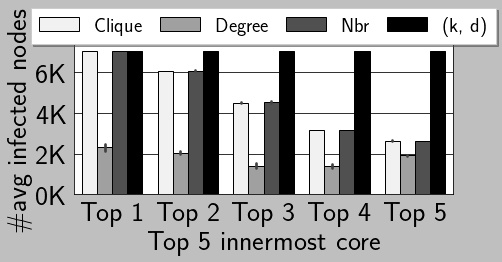

<Figure size 432x288 with 0 Axes>

In [12]:
fontsize = 30
labelsize = 22
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True
# Fig 2:
save = True
final_legend_dic = {
    'nbr': 'Nbr',
    'degree': 'Degree',
    'clique': 'Clique',
    'kd': '(k, d)',
    "dk": '(d, k)'
}

dataset = "dblp"
processed_filename = '../output/processed_propagation_result_prev_9a_' + dataset + '.csv'
result_df = pd.read_csv(processed_filename)
# result_df = result_df[result_df['algo'] != 'kd']
result_df['algo'] = result_df['algo'].replace(final_legend_dic)

dic_sorted_core = {}
for algo in result_df['algo'].unique():
    dic_sorted_core[algo] = list(-np.sort(-result_df[result_df['algo'] == algo]['core number'].unique()))

result_df['core number sorted'] = result_df.apply(
                lambda x: dic_sorted_core[x['algo']].index(x['core number']), axis=1)
result_df['core number sorted'] = result_df.apply(
    lambda x: x['core number sorted'] + 1, axis=1)

for y_var in ['infected', 'neighbors'][:1]:

    # if(dataset == "dblp"):
    #     result_df = result_df[result_df['seed size'] >= 300]
    
    sns.set_style("dark", {'axes.grid' : True})
    plt.style.use('grayscale')

    hatch_dict = {
        'Nbr': "O",
        '(k, d)': '.',
        'Clique': 'x',
        'Degree': '*'
    }

    include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)']
    
    fig, ax = plt.subplots(figsize=(7, 4))
    bar = sns.barplot(x='core number sorted', y=y_var, hue='algo', hue_order=include_algos, data=result_df[(result_df['core number sorted'] < 6)], color='k')
    plt.xlabel('Top 5 innermost core', fontsize=fontsize-2)
    plt.ylabel("\#avg infected nodes", fontsize=fontsize-2)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    labels = ["Top " + str(item.get_text()) for item in ax.get_xticklabels()]
    # labels[1] = 'Testing'
    plt.yticks(fontsize=fontsize-2)
    ax.set_xticklabels(labels, fontsize=fontsize-2)
    # plt.xticks(fontsize=fontsize-2)
    # plt.yticks([0, 2000, 4000, 6000, 8000], fontsize=fontsize-2)
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

    # h = itertools.cycle([hatch_dict[i] for i in include_algos])
    # for i,thisbar in enumerate(bar.patches):
    #     if i%len(include_algos)==0:
    #         hatch = next(h)
    #     thisbar.set_hatch(hatch)


    plt.tight_layout()
    filename = dataset + "_prev_" + y_var + "_fig2.pdf"
    print(filename)
    if(save):
        plt.savefig("../fig/" + filename)
    plt.show()
    plt.clf()
    # break

`Figure 8(c)`

dblp_prev_infected_fig0.pdf


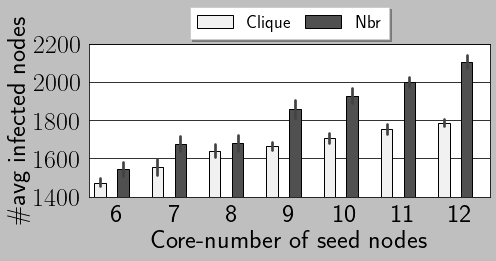

<Figure size 432x288 with 0 Axes>

In [5]:
fontsize = 28
labelsize = 20
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True
# Fig 1
save = True
final_legend_dic = {
    'nbr': 'Nbr',
    'degree': 'Degree',
    'clique': 'Clique',
    'kd': '(k, d)',
    "dk": '(d, k)'
}

dataset = "dblp"
processed_filename = '../output/processed_propagation_result_prev_9a_' + dataset + '.csv'
result_df = pd.read_csv(processed_filename)
# result_df = result_df[result_df['algo'] != 'kd']
result_df['algo'] = result_df['algo'].replace(final_legend_dic)

dic_sorted_core = {}
for algo in result_df['algo'].unique():
    dic_sorted_core[algo] = list(-np.sort(-result_df[result_df['algo'] == algo]['core number'].unique()))

result_df['core number sorted'] = result_df.apply(
                lambda x: dic_sorted_core[x['algo']].index(x['core number']), axis=1)
result_df['core number sorted'] = result_df.apply(
    lambda x: x['core number sorted'] + 1, axis=1)

for y_var in ['infected', 'neighbors'][:1]:

    # if(dataset == "dblp"):
    #     result_df = result_df[result_df['seed size'] >= 300]
    
    sns.set_style("dark", {'axes.grid' : True})
    plt.style.use('grayscale')

    hatch_dict = {
        'Nbr': "O",
        '(k, d)': '.',
        'Clique': 'x',
        'Degree': '*'
    }

    include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)']
    
    fig, ax = plt.subplots(figsize=(7, 4))
    bar = sns.barplot(x='core number', y=y_var, hue='algo', hue_order=include_algos,
            data=result_df[(result_df['core number'] <= 12) & 
                           (result_df['core number'] >= 6) &
                           (result_df['algo'].isin(['Clique', 'Nbr']))], 
                           color='k')
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize-2)
    plt.ylabel("\#avg infected nodes", fontsize=fontsize-2)
    plt.ylim(1400, 2200)

    plt.xticks(fontsize=fontsize-2)
    plt.yticks(fontsize=fontsize-2)
    
    # plt.legend(loc='upper center', bbox_to_anchor=(
    #     0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

    # subset of legends
    x,y = ax.get_legend_handles_labels()
    x= [x[0], x[2]]
    y= [y[0], y[2]]
    ax.get_legend().remove()
    plt.legend(*(x,y),loc='upper center', bbox_to_anchor=(
        0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)
    

    plt.tight_layout()
    filename = dataset + "_prev_" + y_var + "_fig1.pdf"
    print(filename)
    if(save):
        plt.savefig("../fig/" + filename)
    plt.show()
    plt.clf()
    # break

`Figure 8(c)`

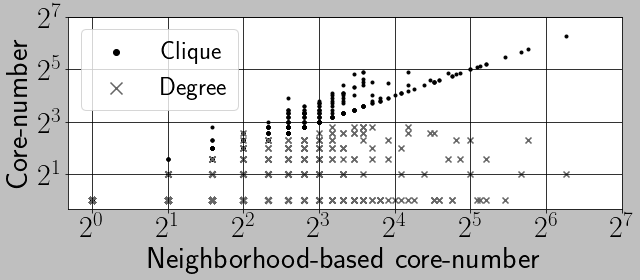

In [2]:
import random
import numpy as np

fontsize = 28
labelsize = 20

dataset = 'dblp'
algorithms = ['Peel','naive_degree','clique']
alggood_name = {
            'Peel': 'Nbr',
            'clique': 'Clique',
            'naive_degree':'Degree',
            'bipartite': 'D2Bipartite'
                }
cores = {}
pdf = {}
cdf = {}
coregroupids = {}
num_div = 20
random.seed(1)
def near_split(x, num_bins):
    quotient, remainder = divmod(x, num_bins)
    return [quotient + 1] * remainder + [quotient] * (num_bins - remainder)

# def near_split(x,num_bins):
#     # assume x as the core_values list
#     y = sorted(copy.copy(x),reverse = True)
#     _splits = []
#     _take = len(x)//num_bins
#     while _take >=0:
#         pass
def get_index(query,a):
    if(query<a[0]):
        ans = 0
    elif (query>=a[-1]):
        ans = len(a)-1
    else:
        # for i,val in enumerate(a):
        i = 1
        while query>=a[i]:
            i+=1
        ans = i
    return ans

keeptrack_nodes = {}
for alg in algorithms:
    # print(alg)
    name = '../output/core_'+alg+'_'+dataset+'.csv'
    _dict = {}
    N = 0
    cv = {}
    nodesingrp = [0]*num_div
    with open(name,'r') as f:
        for line in f:
            l = line.strip().split(',')
            l = (int(l[0]),int(l[1]))
            cv[l[0]] = l[1]
            _dict[l[1]] = _dict.get(l[1],0)+1
            N +=1
    splits = near_split(N,num_div)
    for k in _dict:
        _dict[k] = (_dict[k]*100.0)/N
            
    x,y = zip(*sorted(_dict.items()))
    cores[alg] = x
    b = near_split(max(x)-min(x),num_div)
    a = x[0] + np.array(b).cumsum()
    # print([x[0]]+list(a))
    for node in cv:
        query = cv[node]
        if alg=='Peel':
            _i = get_index(query,a)
            if _i not in keeptrack_nodes:
                keeptrack_nodes[_i] = []
            keeptrack_nodes[_i].append(node)
        # else:
        #     _i = 
            nodesingrp[_i] = nodesingrp[_i]+1
    # print(keeptrack_nodes.keys())
    pdf[alg] = y
    cdf[alg] = np.cumsum(y[::-1])[::-1]
    # for i in range(num_div):
    for i in keeptrack_nodes.keys():
        if len(keeptrack_nodes[i])==0:
            continue
        if alg=='Peel':
            coregroupids[alg] = [i]*5
            continue
        S = random.sample(keeptrack_nodes[i],5)
        # print(i,' ',S)
        _tmp = []
        for u in S:
            _i = get_index(cv[u],a)
            _tmp.append(_i)
        coregroupids[alg] = coregroupids.get(alg,[])+_tmp

alg_cores = {}
for alg in algorithms:
    # print(alg)
    name = '../output/core_'+alg+'_'+dataset+'.csv'
    _dict = {}
    N = 0
    cv = {}
    nodesingrp = [0]*num_div
    with open(name,'r') as f:
        for line in f:
            l = line.strip().split(',')
            l = (int(l[0]),int(l[1]))
            cv[l[0]] = l[1]
    alg_cores[alg] = cv

x,y = zip(*alg_cores['Peel'].items())
y1 = [alg_cores['naive_degree'][u] for u in x]
y2 = [alg_cores['clique'][u] for u in x]

from matplotlib import pyplot as plt 
from matplotlib.ticker import MaxNLocator
import seaborn as sns 
import random
# sns.set(rc={'figure.figsize':(9,4)})
# sns.set_style("ticks")
# sns.set_style("dark", {'axes.grid' : True})
plt.style.use('grayscale')
# plt.rcParams["font.family"] = "serif"
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (9,4)

random.seed(6)
fontsize = 30
_i = random.sample(list(range(0,len(y)+1)),1000)
xx = [y[i] for i in _i]
yy = [y2[i] for i in _i]
yy2 = [y1[i] for i in _i]

plt.scatter(xx,yy,marker = '.',label='Clique')
plt.scatter(xx,yy2,marker = 'x',label='Degree')
plt.xlabel('Neighborhood-based core-number',fontsize=fontsize)
plt.ylabel('Core-number',fontsize=fontsize)
plt.xscale('log',base = 2)
plt.yscale('log',base = 2)
plt.xticks([2**0,2**1,2**2,2**3,2**4,2**5,2**6,2**7],fontsize=fontsize)
plt.yticks([2**1,2**3,2**5,2**7],fontsize=fontsize)
plt.legend(loc="upper left", fontsize=labelsize, markerscale = 2, prop={'size': 25})
plt.grid()
plt.tight_layout()
plt.savefig('../fig/clique-vs-ours2.pdf')
plt.show()

`Figure 8(d)`

../fig/dblp_9c_100.pdf


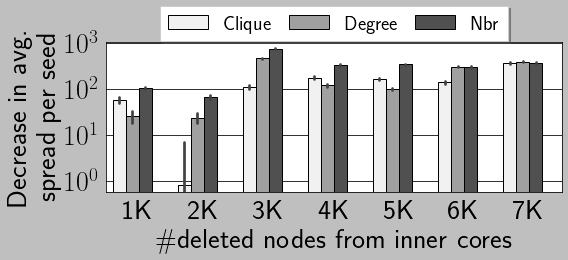

<Figure size 432x288 with 0 Axes>

In [4]:
import shutil
from ast import literal_eval
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import argparse
import itertools
plt.rcParams['text.usetex'] = True

output_folder = '../output/'

fontsize = 30
labelsize = 22
save = True
    

dataset = 'dblp'
processed_filename = "../output/processed_propagation_result_9b_" + dataset + ".csv"
time_step_list = [100]
if(not os.path.isfile(processed_filename)):

    src = '../output/'
    cols = ['algo', 'dataset', 'exp', 'intervention_results', 'max propagation time',
            'num delete', 'p', 'result', 'seed size', 'timestep_results']
    # cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results', 'num delete']
    # cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']

    df_nbr = pd.read_csv(
        src + "propagation_result_recursive_delinner_" + dataset + "_naive_nbr3.csv", header=None)
    df_nbr.columns = cols

    df_degree = pd.read_csv(
        src + "propagation_result_recursive_delinner_" + dataset + "_naive_degree3.csv", header=None)
    df_degree.columns = cols

    df_graph_core = pd.read_csv(
        src + "propagation_result_recursive_delinner_" + dataset + "_graph_core3.csv", header=None)
    df_graph_core.columns = cols

    df = pd.concat([df_degree, df_nbr, df_graph_core])
    df.head(n=10)


    

    # plt.style.use('grayscale')
    # from matplotlib.ticker import MaxNLocator
    # sns.set(rc={'figure.figsize': (7, 4)})
    # plt.rcParams['figure.figsize'] = (7,5)

    lw = 3
    output_folder = '../fig/'
    topk = 5

    ignore_datasets = ['bin_1', 'bin_2', 'bin_4',
                    'bin_5', 'congress', 'contact']
    group_list = ['dataset', 'p', 'algo', 'num delete']
    goodname_algo = {
        'graph_core': 'clique',
        'naive_nbr': 'nbr',
        'naive_degree': 'degree'
    }
    order = [goodname_algo[a]
            for a in ['naive_nbr', 'graph_core', 'naive_degree']]

    df_plot = None
    for key, item in df[(df['intervention_results'].notnull())].groupby(group_list, as_index=False):

        print(key)
        # print(item)
        # continue

        item['algo'] = item['algo'].replace(goodname_algo)
        assert len(item['algo'].unique()) == 1

        result = literal_eval(item['intervention_results'].iloc[0])

        result_df = pd.DataFrame()
        result_tuple = [('H'+str(hypergraph_id), k, iteration, time_step + 1, node_id, time_step_results, key[3])
                        for hypergraph_id in sorted(list(result.keys()))
                        for k in result[hypergraph_id]
                        for iteration, all_iteration_results in enumerate(result[hypergraph_id][k])
                        for node_id, single_iteration_results in enumerate(all_iteration_results)
                        for time_step, time_step_results in enumerate(single_iteration_results[2])]

        result_df = result_df.append(pd.DataFrame(result_tuple, columns=[
            'hypergraph', 'core number', 'iteration', 'time_step', 'seed id', 'infected', 'num delete']), ignore_index=False)

        # print(meandf)
        merged_df = pd.merge(result_df[result_df['hypergraph'] == "H0"], result_df[result_df['hypergraph'] == "H1"],
                             how="inner", on=["core number", "iteration", "time_step", 'seed id', 'num delete'])
        merged_df['infected difference'] = merged_df.apply(
            lambda x: x['infected_x'] - x['infected_y'], axis=1)
        merged_df['Decomposition'] = goodname_algo[key[2]]

        merged_df.drop(['infected_x', 'infected_y', 'hypergraph_x',
                        'hypergraph_y'], axis=1, inplace=True)

        # print(merged_df)

        if(df_plot is None):
            df_plot = merged_df.copy()
        else:
            df_plot = df_plot.append(merged_df, ignore_index=True)

    df_plot.to_csv(processed_filename, header=True, index=False, mode='a')
else:
    df_plot = pd.read_csv(processed_filename)

for time_step in time_step_list:

    final_legend_dic = {
        'nbr': 'Nbr',
        'degree': 'Degree',
        'clique': 'Clique',
        'kd': '(k, d)',
        "dk": '(d, k)'
    }

    hatch_dict = {
        'Nbr': "O",
        '(k, d)': '.',
        'Clique': 'x',
        'Degree': '*'
    }
    include_algos = ['Clique', 'Degree', 'Nbr','(k, d)']

    # df_plot['num delete'] = df_plot.apply(lambda x: 1000 if x['num delete'] == -1 else x['num_delete'], axis=1)
    df_plot['Decomposition'] = df_plot['Decomposition'].replace(final_legend_dic)

    #print(df_plot['num delete'].dtype)
    df_plot['num delete'] = df_plot['num delete'].astype(int)
    #print(df_plot['num delete'].dtype)

    # assert len(df_plot['core number sorted'].unique()) == 1
    sns.set_style("dark", {'axes.grid' : True})
    plt.style.use('grayscale')
    fig, ax = plt.subplots(figsize=(8, 4))
    bar = sns.barplot(y='infected difference', x='num delete',
                hue='Decomposition', hue_order=include_algos, data=df_plot[df_plot['time_step'] == time_step], color='k')
    plt.xlabel('\#deleted nodes from inner cores', fontsize=fontsize - 2)
    plt.ylabel("Decrease in avg.\nspread per seed", fontsize=fontsize - 2)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x+1) + 'K'))
    #ax.xaxis.set_major_formatter(ticker.EngFormatter())
    plt.xticks(fontsize=fontsize - 2)
    plt.yticks([0, 200, 400, 600, 800], fontsize=fontsize - 2)
    plt.yscale('log')
    # plt.grid(axis="y")

    # h = itertools.cycle([hatch_dict[i] for i in include_algos])
    # for i,thisbar in enumerate(bar.patches):
    #     if i%len(include_algos)==0:
    #         hatch = next(h)
    #     thisbar.set_hatch(hatch)

    # plt.legend(loc='best', fontsize=fontsize-4)
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)
    x,y = ax.get_legend_handles_labels()
    x= x[:-1]
    y= y[:-1]
    ax.get_legend().remove()
    plt.legend(*(x,y),loc='upper center', bbox_to_anchor=(
        0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)
    # plt.title(dataset + ", #delete: " + str(num_delete) +", time:" + str(time_step), fontsize=fontsize - 4)
    # plt.title(dataset + ", " + "time: " + str(time_step), fontsize=fontsize - 4)
    # leg = plt.legend(loc="best", fontsize=fontsize-6,
    #                 frameon=False, bbox_to_anchor=(0.44, 0.52))
    # for legobj in leg.legendHandles:
    #     legobj.set_linewidth(4.0)

    plt.tight_layout()
    filename = "../fig/" + dataset + "_9c_" + str(time_step) + ".pdf"
    print(filename)
    # print(output_folder)
    if(save):
        plt.savefig(filename)
        plt.show()
        pass
    else:
        # print(filename)
        # plt.show()
        pass
        # break
    plt.clf()